In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [11]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
m = 1.
c = 1.
theta_e = 10.
#nu_c = 1
B = 10.
e = 1


#constants in Gaussian cgs units (values from harmony)
#m = 9.1e-28
#c = 3e10
#theta_e = 5.8e10
#nu_c = 8.4e7
#nu = 5e7


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 700. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
n_e_nt = 1.
p_PL = 3.
gamma_50_min = 1.
gamma_50_max = 1000.
C = 10.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 10.

#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f



#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)


#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans

def K_s(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn

def PL_f(gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    prefactor_PL  = 1. / (m**3 * c**3 * gamma**2 * beta)
    non_thermal_body = n_e_nt *(p_PL - 1.)/(4.*np.pi*(gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL)))
    non_thermal_tail = gamma**(- p_PL) 
    PL_dist = prefactor_PL * non_thermal_body * non_thermal_tail
    return PL_dist



def I_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
    ans = prefactor_Jnu * PL_f(gamma) * d_3_p * K_s(n, gamma)
    
    return ans

def jnu_integrand_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_62 = 1. / (nu * beta * np.absolute(np.cos(theta)))
    
    f = prefactor_62 * I_in_eq62(gamma, n)
    
    return f

def jnu_n_integral_62_one(n):
    
    def jnu_integrand_in_eq62_gamma(gamma):
        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
        return jnu_integrand_62
    
    def jnu_integrand_in_eq62_gamma_with_cutoff(gamma):
        jnu_integrand_62_cutoff = jnu_integrand_in_eq62(gamma, n) * np.exp(- Index_cutoff * (gamma - gamma_50_max))
        return jnu_integrand_62_cutoff
    
    if gamma_dn_limit(n) <= gamma_50_min and gamma_up_limit(n) > gamma_50_min and gamma_up_limit(n) <= gamma_50_max:
        ans_once1 = quad(jnu_integrand_in_eq62_gamma, gamma_50_min, gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
        return ans_once1
    else:
        if gamma_dn_limit(n) >= gamma_50_min and gamma_dn_limit(n) < gamma_50_max and gamma_up_limit(n) <= gamma_50_max:
            ans_once2 = quad(jnu_integrand_in_eq62_gamma, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
            return ans_once2
        else:
            if gamma_dn_limit(n) <= gamma_50_min and gamma_up_limit(n) >= gamma_50_max:   
                ans_once_1 = quad(jnu_integrand_in_eq62_gamma, gamma_50_min, gamma_50_max, epsabs = 0, epsrel = 1e-8)[0]
                ans_once_2 = quad(jnu_integrand_in_eq62_gamma_with_cutoff, gamma_50_max, gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
                ans_once3 = ans_once_1 + ans_once_2
                return ans_once3
            else:
                if gamma_dn_limit(n) >= gamma_50_min and gamma_dn_limit(n) < gamma_50_max and gamma_up_limit(n) >= gamma_50_max:
                    ans_once_1_1 = quad(jnu_integrand_in_eq62_gamma, gamma_dn_limit(n), gamma_50_max, epsabs = 0, epsrel = 1e-8)[0]
                    ans_once_1_2 = quad(jnu_integrand_in_eq62_gamma_with_cutoff, gamma_50_max, gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
                    ans_once4 = ans_once_1_1 + ans_once_1_2
                    return ans_once4
                else:
                    if gamma_dn_limit(n) >= gamma_50_max and gamma_up_limit(n) >= gamma_50_max:
                        ans_once5 = quad(jnu_integrand_in_eq62_gamma_with_cutoff, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
                        return ans_once5
                    else:
                        print "invalid gamma limits, can't integral"
        
#    ans_once = quad(jnu_integrand_in_eq62_gamma, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
    
#    return ans_once

#def jnu_nonthermal_power_law():
#    ans = 0
#    for i in range(int(n_dn + 1.), int(n_dn + 100000.)):
#        ans = ans + jnu_n_integral_62_one(i)
#    return ans

n_peak = 80000

def jnu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(jnu_n_integral_62_one, n_max, C * n_peak, epsabs = 0, epsrel = 1e-8)[0]
    
    return ans
    

def jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + jnu_n_integral_62_one(i)
#        print ans
        
    total = ans + jnu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total



n_max = 1000
print jnu_62_sum_to_n_max_integral_to_n_limit(n_max)

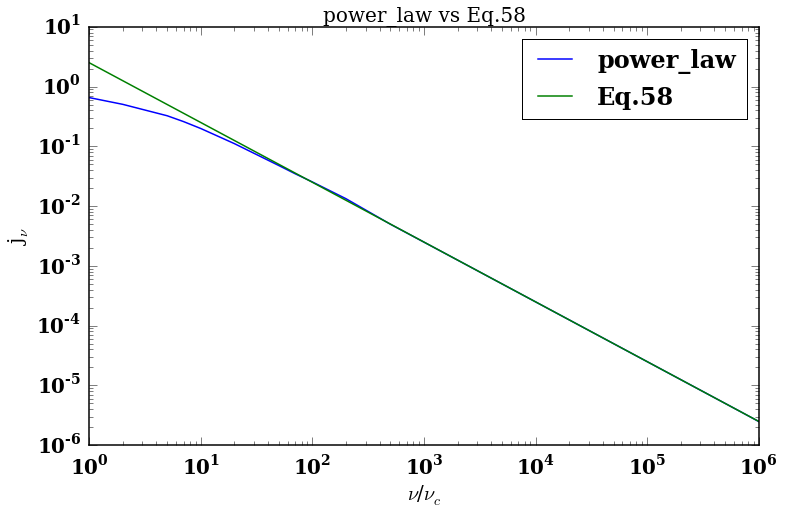

In [8]:
def jnu_58(x):
    first_part       = n_e_nt * (e**2 * nu_c /c)
    second_part_nume = 3.**(p_PL/2.) * (p_PL - 1.) * np.sin(theta)
    second_part_demo = 2. * (p_PL + 1.) * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    second_part      = second_part_nume/second_part_demo
    third_part       = special.gamma((3. * p_PL - 1.)/ 12.) * special.gamma((3. * p_PL + 19.)/12.)
    fourth_part      = (x/(nu_c * np.sin(theta)))**(- (p_PL - 1.)/2.)
    ans              = first_part * second_part * third_part * fourth_part
    return ans

x = np.arange(1.*nu_c, 1000000.*nu_c, 1)
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("j$_\\nu$")

#pl.loglog(x, jnu_58(x))
#print jnu_58(10. * nu_c)
#jnu_58(nu)


data = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/power_law_data.txt') 
pl.loglog(data[:, 0], data[:, 1], label = 'power_law')
pl.loglog(x/nu_c, jnu_58(x), label = 'Eq.58')
pl.title("power_law vs Eq.58")
pl.legend()
pl.show()

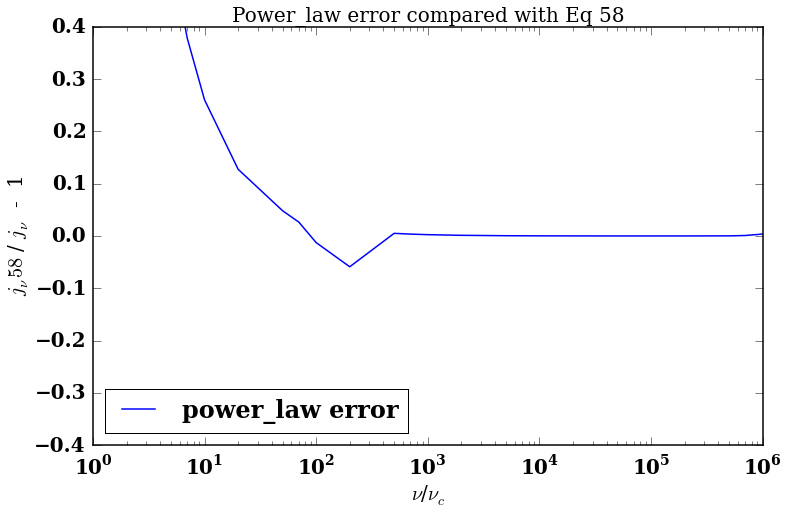

In [10]:
data = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/power_law_data.txt')

def error_nonthermal_with_eq58():
    
    data_x = data[:, 0]
    
    ans = jnu_58(data_x * nu_c)
    
    error = ans / data[:, 1] - 1.
    
    return error
    
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$j_\\nu58$ / $j_\\nu$  -  1")
pl.ylim([-0.4, 0.4])

pl.semilogx(data[:, 0], error_nonthermal_with_eq58(), label = 'power_law error')
pl.legend(loc = 'lower left')
pl.title("Power_law error compared with Eq 58")

pl.show()
    

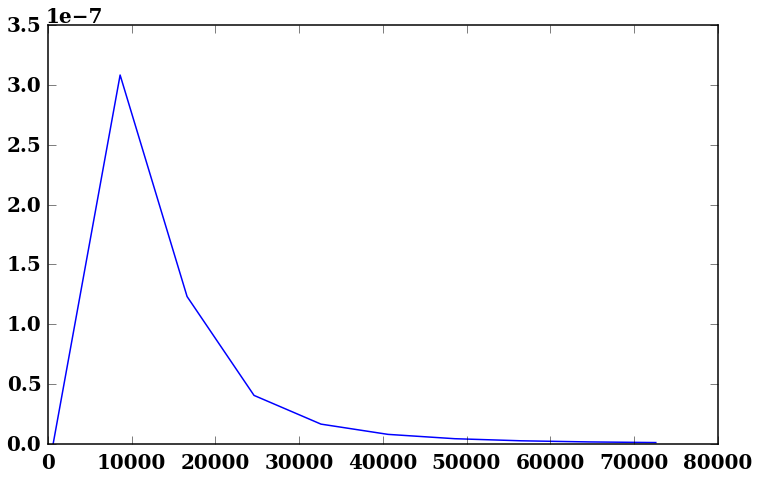

In [400]:
x_value = []
y_value = []

n_max_here = 80000

step = int((int(n_max_here))/10.)


for i in xrange(int(n_dn + 1.), int(n_dn + 1. + n_max_here), step):
    x_value = x_value + [i]
    y_value = y_value + [jnu_n_integral_62_one(i)]

#    print int(n_dn + 1.), x_value
pl.plot(x_value, y_value)
#print x_value, int(n_dn+1) 
#pl.xlim([0,4000])

In [402]:
n_max = 1000
print jnu_62_sum_to_n_max_integral_to_n_limit(n_max)

0.00355851266636


In [194]:
if 1 < 2 and 2 < 3:
    print 1
else: print 2

1


In [173]:
if?

Object `if` not found.


In [196]:
print "hahah"

hahah


In [218]:
def text(x):
    if 3 > x > 1:
        ans1 = 1
        return ans1
    else:
        if x > 3:
            ans2 = 2
            return ans2

In [219]:
text(2)

1

In [231]:
np.exp(1)

2.7182818284590451

In [232]:
e

1